# Lab 4: Working with 'real' data

## Introduction

In this lab we are going to work on how to estimate the background from 'real' data. Real is in air quotes because the data is actually from simplified simulations to make the problems manageable in a single lab. But the data will have some features that resemble that of real data sets.

## Problem 1

In this problem we are looking at the data from a gamma-ray satellite orbiting in low Earth orbit. It takes a reading of the number of particles detected every 100 milliseconds, and is in an approximately 90 minute orbit. While it is looking for gamma-ray bursts, virtually all of the particles detected are background cosmic rays.

As with most data, there are 'features.' Your lab instructor has helpfully incorporated the meta-data into your data file.

1) Down load the data from the course website (gammaray_lab4.h5), and import it into your working environment. The data has 4 columns and more than 25 million rows. The columns are time (in gps seconds), Solar phase (deg) showing the position of the sun relative to the orbit, Earth longitude (deg) giving the position of the spacecraft relative to the ground, and particle counts. Make a few plots, generally exploring your data and making sure you understand it. Give a high level description of the data features you see. Specifically comment on whether you see signal contamination in your data, and how you plan to build a background pdf().

In [112]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd
import h5py
#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

In [28]:
hf = h5py.File('gammaray_lab4.h5', 'r')
hf.keys()
data = np.array(hf.get('data'))
data[:,0]
hf.close()

In [29]:
time=data[0,:]
phase=data[1,:]
longitude=data[2,:]
counts= data[3,:]
print("the total milliseconds that we collected data is", (len(counts)-1))

the total milliseconds that we collected data is 25920000


We know the number of particles detected every 100 milliseconds, and is in an approximately 90 minute orbit. So in 25920000 miliseconds, there are 2592000 data was collected. We can calculated how many data was collected in one orbit to set an interval for the time vs gamma ray count.
$90min*\frac{60sec}{1min}*\frac{2592000data}{25920000sec}=5400 data$

Using similar calculation we can get an interval for the data per day. $24hr*\frac{60min}{1hr}*\frac{5400data}{90min}=86400 data$ 

In [ ]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.hist2d(phase,counts, bins = [75,30])
ax2.hist2d(longitude,counts, bins = [75,30])
#fig, (ax3,ax4) =plt.subplots(2)
ax3.hist2d(time%5400,counts, bins = [500,30])
ax4.hist2d(time%86400,counts, bins = [500,30])
ax1.title.set_text('Histogram of Solar Phase vs. Gamma Ray Count')
ax2.title.set_text('Histogram of Longitude vs. Gamma Ray Count')
ax3.title.set_text('Histogram of Gamma Ray Count per one orbit')
ax4.title.set_text('Histogram of Gamma Ray Count per day')
plt.show()

From the plots above, we see that the gamma ray count stay constant with respect to Solar phase. For the gamma ray count per day, we see a periodic behavior which make senses since it have a 90 min orbit. When we look at the plot per one orbit, its seem similar to the longtitude plot. There is a relationship between the gamma ray count and the longtitude. Also I think there is signal contamination every 90 minute because the gamma ray count "jump" to a high number. 

Text(0, 0.5, 'Probability Mass')

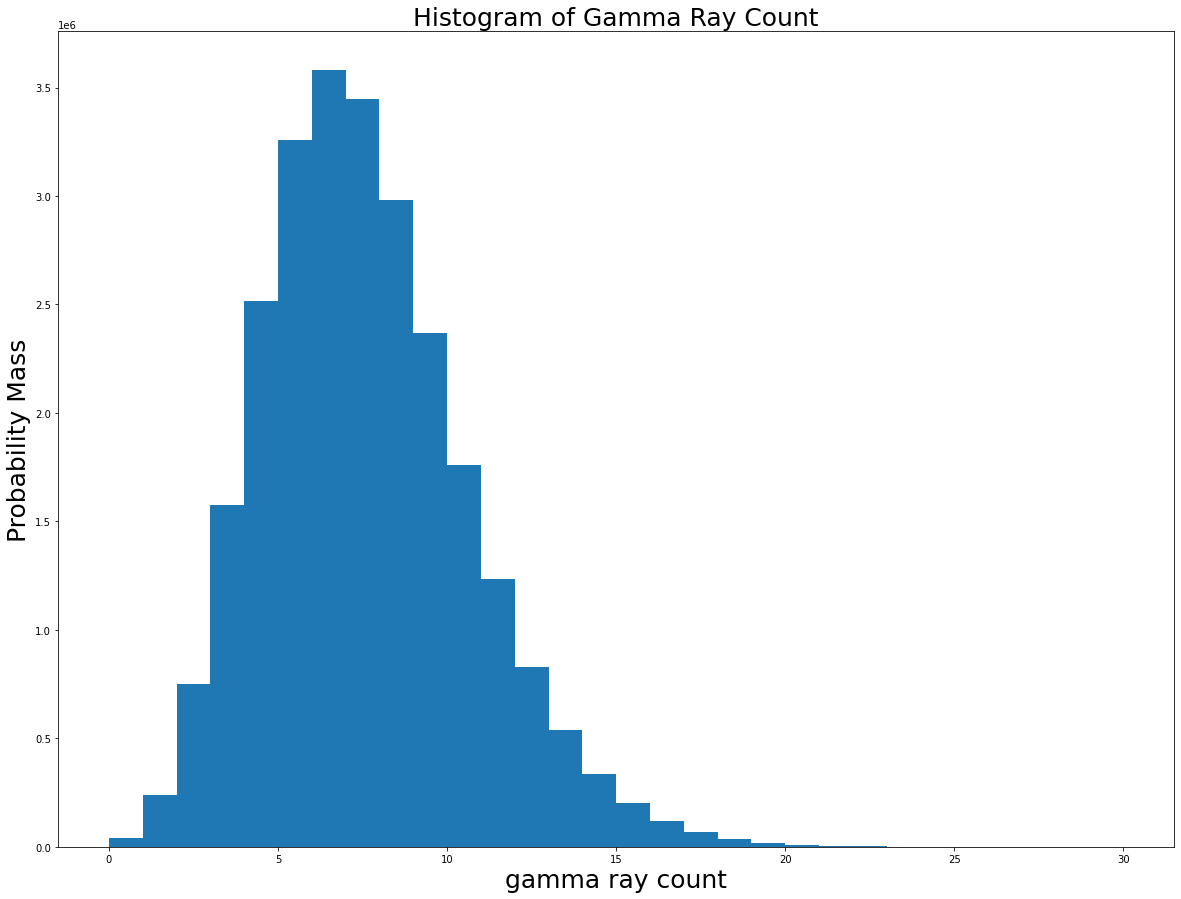

In [58]:
fig, ax = plt.subplots(1)
ax.hist(counts, bins=np.arange(0, counts.max()+1))
plt.title('Histogram of Gamma Ray Count', size=25)
plt.xlabel('gamma ray count', size=25)
plt.ylabel('Probability Mass',size=25)

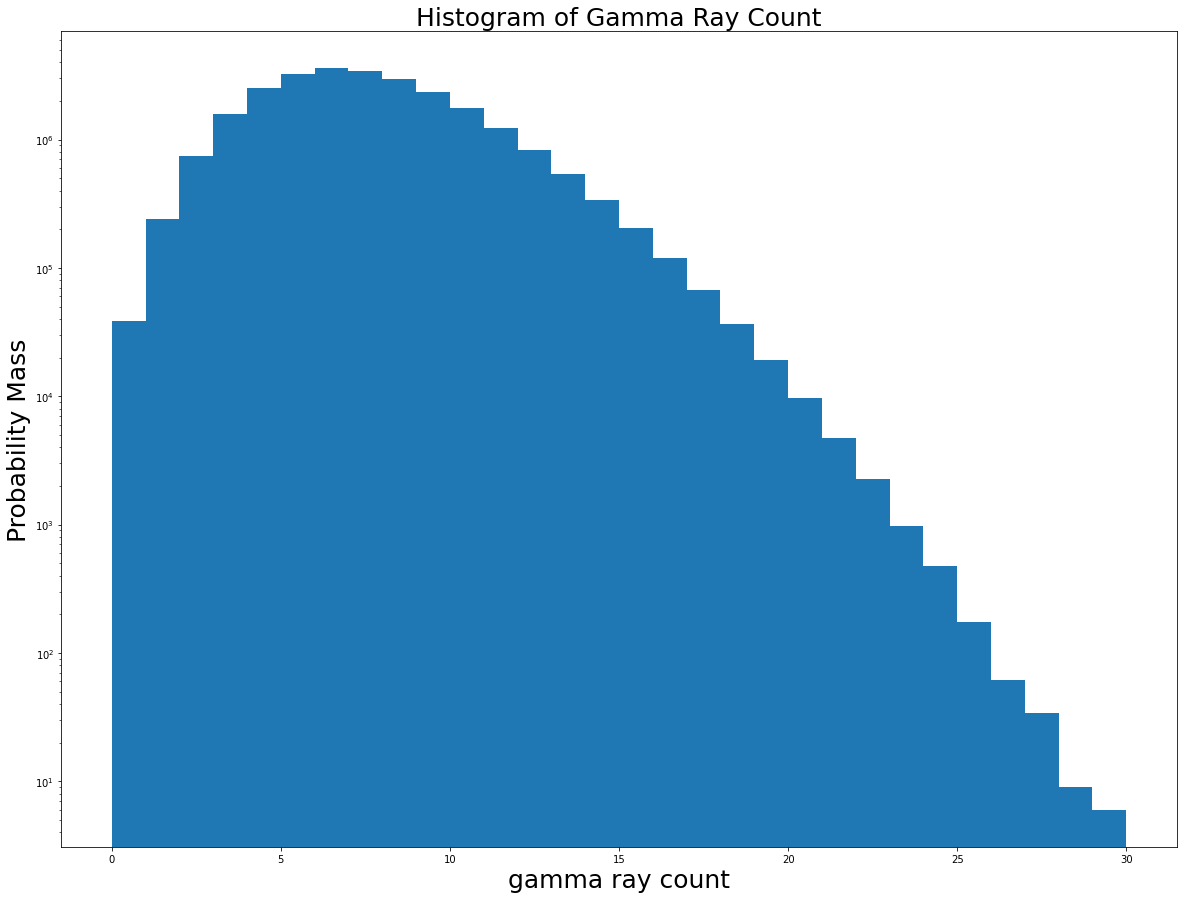

In [55]:
fig, ax = plt.subplots(1)
ax.hist(counts, bins=np.arange(0, counts.max()+1))
plt.title('Histogram of Gamma Ray Count', size=25)
plt.xlabel('gamma ray count', size=25)
plt.ylabel('Probability Mass',size=25)
plt.yscale('log')

The gamma ray distribution follow Possion distribution

2) The background is not consistent across the dataset. Find and describe as accurately as you can how the background changes.

Let plot the average gamma ray count over 100s interval. 

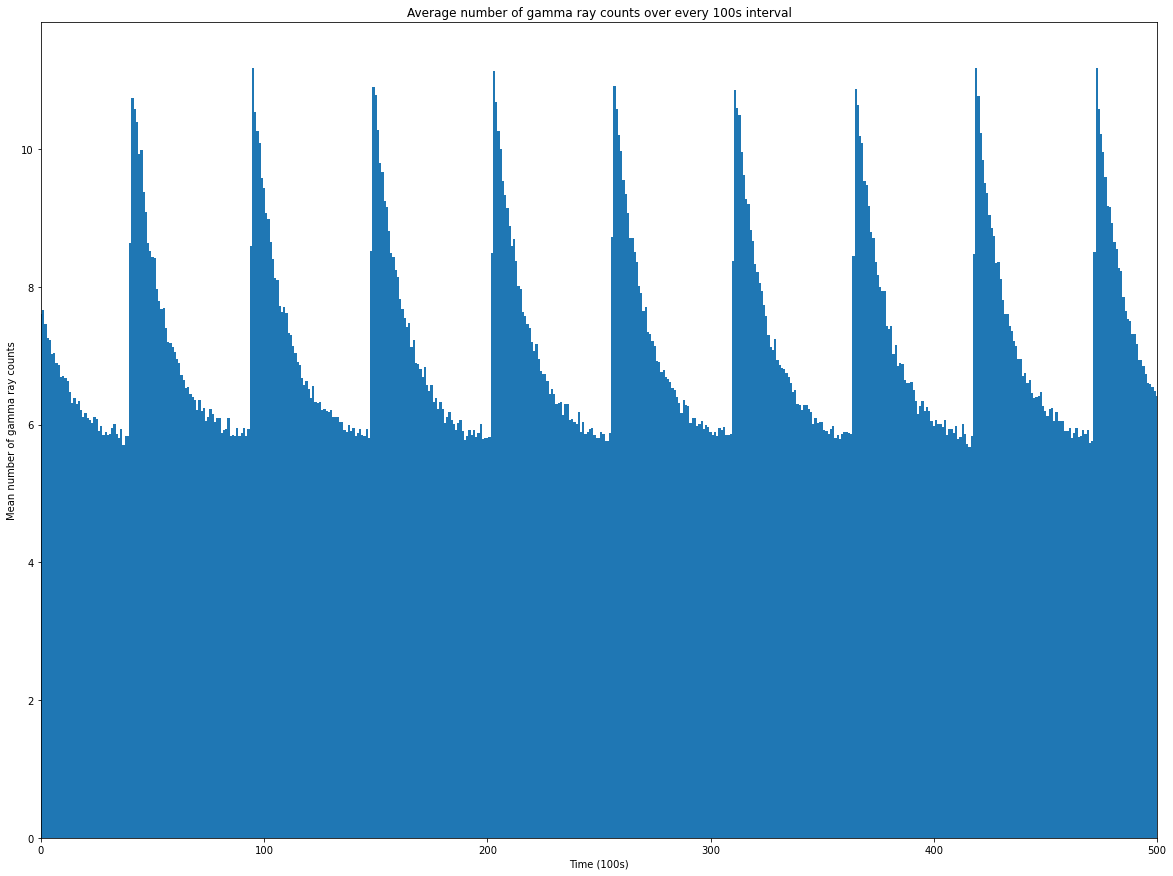

In [60]:
avg= []
for i in np.arange(0, (len(time)-1)/1000):
    p = np.asarray(counts[int(1000*i):int(1000*(i+1))].sum()/1000)
    avg.extend([p])
plt.title('Average number of gamma ray counts over every 100s interval')
plt.bar(np.arange(0, 25920), np.array(avg), width=1)
plt.xlabel('Time (100s)')
plt.ylabel('Mean number of gamma ray counts')
plt.xlim(0, 500)
plt.show()

 We see that the mean number of gamma ray counts follows some periodic function. Its seem like an exponential decay. 

3) Create a model for the background that includes time dependence, and explicitly compare your model to the data. How good is your model of the background?

Because the gamma ray count is discrete so we can use the poisson distribution to model the background with 90 min period (1 orbit)

(0.0, 25.0)

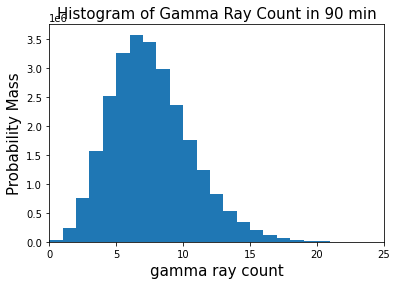

In [109]:
fig, ax = plt.subplots(1)
dist= ax.hist(counts, bins=np.arange(0, counts.max()+1))
plt.title('Histogram of Gamma Ray Count in 90 min', size=15)
plt.xlabel('gamma ray count', size=15)
plt.ylabel('Probability Mass',size=15)
plt.xlim(0,25)

(0.0, 25.0)

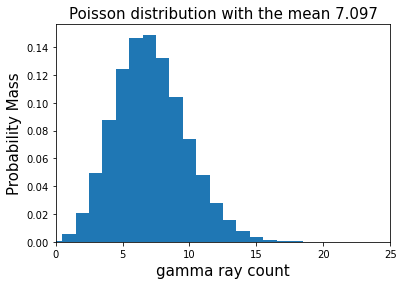

In [108]:
mean=np.mean(counts)
fig, ax = plt.subplots(1)
x=range(0,5400)
ax.bar(x,stats.poisson.pmf(x,mean),width=1)
plt.title('Poisson distribution with the mean 7.097', size=15)
plt.xlabel('gamma ray count', size=15)
plt.ylabel('Probability Mass',size=15)
plt.xlim(0,25)

The plots are not quite similar. Maybe because the mean change over time, it will be more similar if we decrease the interval of time. We can create different model for different time.

4) Because the background varies, your discovery sensitivity threshold (how many particles you would need to see) also varies. What is the '5-sigma' threshold for a 100 millisecond GRB at different times?

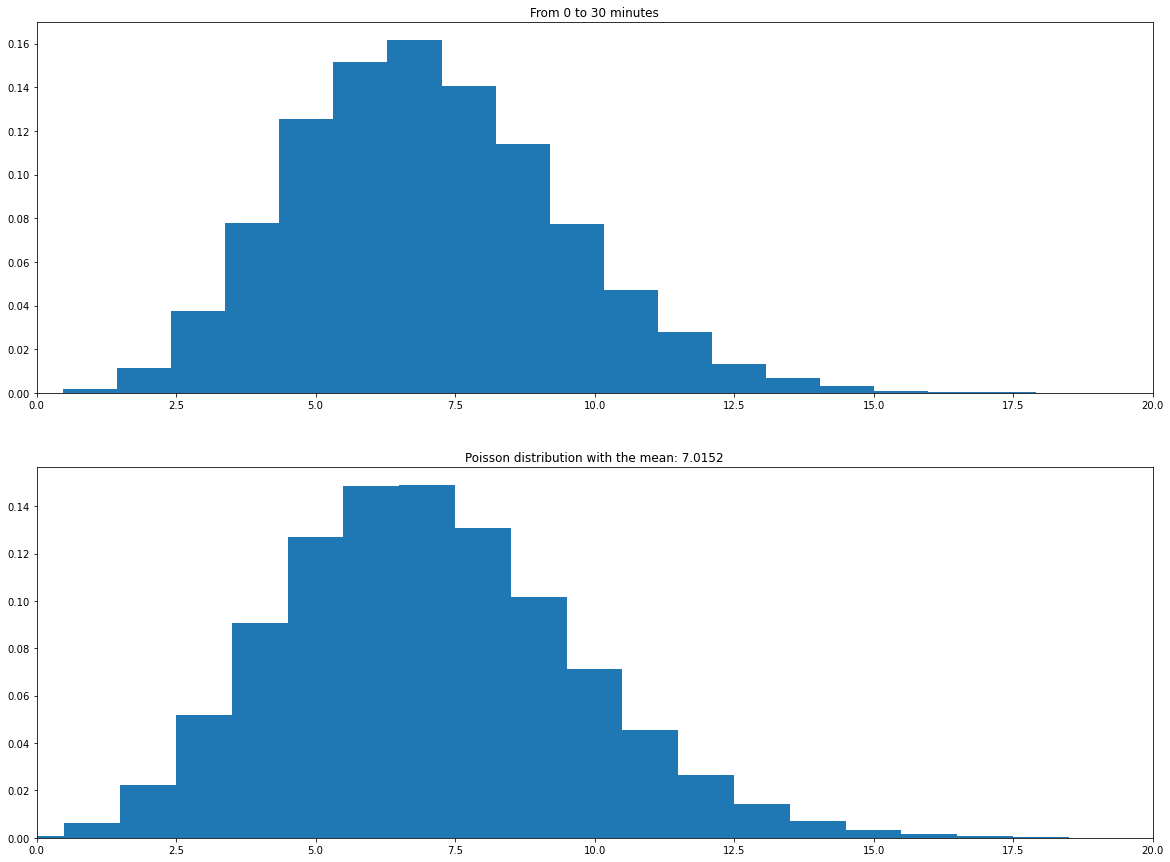

In [117]:
dist = plt.hist2d((t)%5400,y, bins=[540,31])
mean = np.zeros(540)
x = range(0,540)
for i in range(0,540):
    mean[i] = sum(dist[2][1:]*dist[0][i,:]/sum(dist[0][i,:]))
plt.close()
#0-30min
fig, (ax1,ax2) = plt.subplots(2)
ax1.bar(dist[2][1:],dist[0][180,:]/sum(dist[0][180,:]),width=1)
ax1.set_xlim([0,20])
ax1.title.set_text('From 0 to 30 minutes' )
ax2.bar(x,stats.poisson.pmf(x,mean[180]),width=1)
ax2.set_xlim([0,20])
ax2.title.set_text('Poisson distribution with the mean: ' + str(np.round(mean[180],4)))

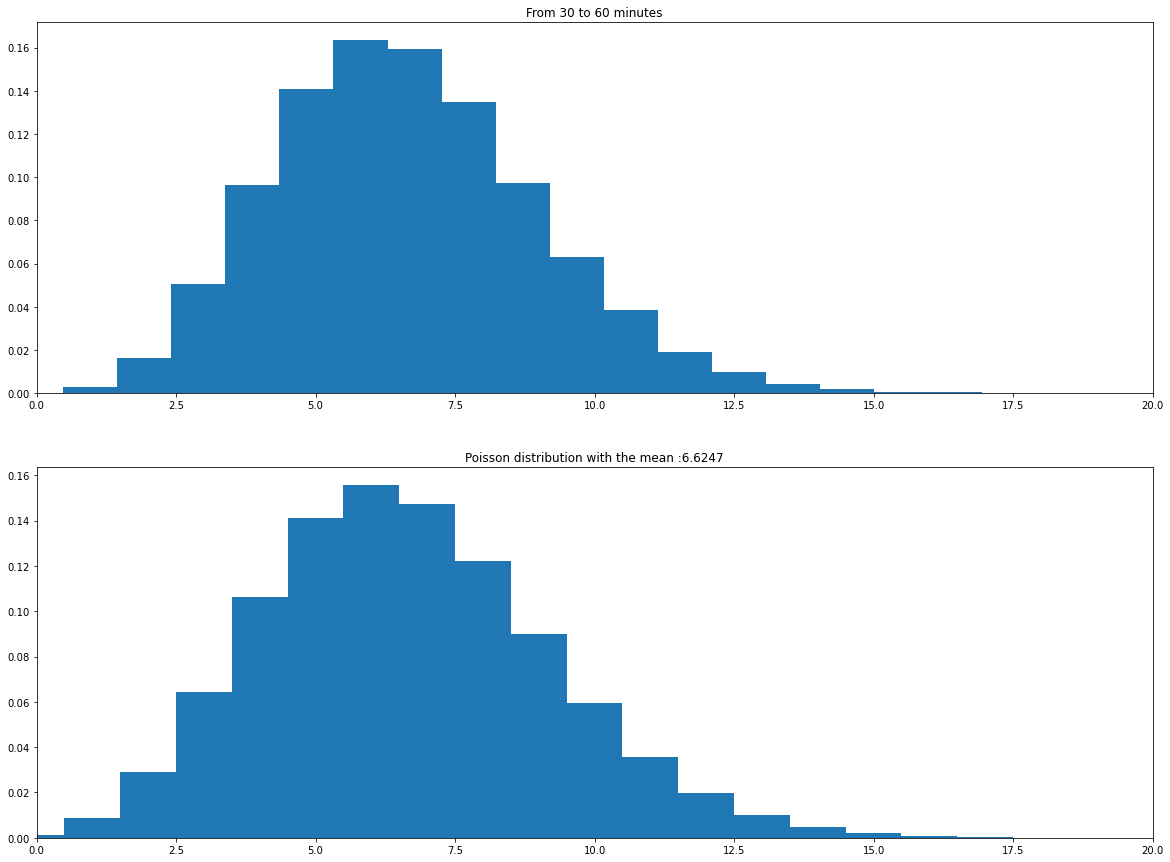

In [118]:
#30-60 min
fig, (ax1,ax2) = plt.subplots(2)
ax1.bar(dist[2][1:],dist[0][360,:]/sum(dist[0][360,:]),width=1)
ax1.set_xlim([0,20])
ax1.title.set_text('From 30 to 60 minutes' )
ax2.bar(x,stats.poisson.pmf(x,mean[360]),width=1)
ax2.set_xlim([0,20])
ax2.title.set_text('Poisson distribution with the mean :' + str(np.round(mean[360],4)))

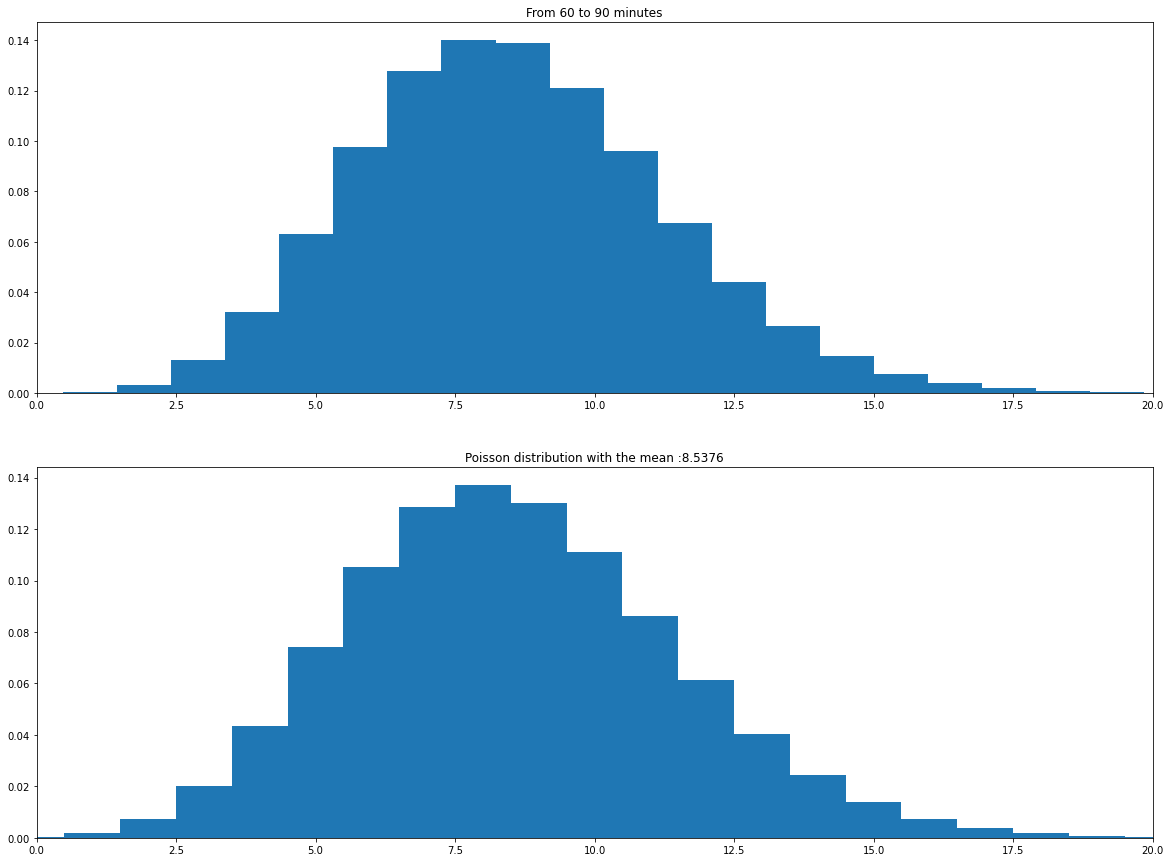

In [121]:
#30-60 min
fig, (ax1,ax2) = plt.subplots(2)
ax1.bar(dist[2][1:],dist[0][539,:]/sum(dist[0][539,:]),width=1)
ax1.set_xlim([0,20])
ax1.title.set_text('From 60 to 90 minutes' )
ax2.bar(x,stats.poisson.pmf(x,mean[539]),width=1)
ax2.set_xlim([0,20])
ax2.title.set_text('Poisson distribution with the mean :' + str(np.round(mean[539],4)))

From the plots above we can see that the mean changes over time. The value of '5-sigma' threshold for a 100 millisecond GRB at these different times are

In [125]:
prob= stats.norm.cdf(5)
# 0-30
val1=stats.poisson.ppf(prob,mean[180])
# 30-60
val2=stats.poisson.ppf(prob,mean[360])
# 60-90
val3=stats.poisson.ppf(prob,mean[539])
print("The value of 5 sigma in 0-30min time interval is", val1,' gamma rays for a 100 millisecond GRB')
print("The value of 5 sigma in 30-60min time interval is", val2,' gamma rays for a 100 millisecond GRB')
print("The value of 5 sigma in 60-90min time interval is", val3,' gamma rays for a 100 millisecond GRB')

The value of 5 sigma in 0-30min time interval is 24.0  gamma rays for a 100 millisecond GRB
The value of 5 sigma in 30-60min time interval is 23.0  gamma rays for a 100 millisecond GRB
The value of 5 sigma in 60-90min time interval is 27.0  gamma rays for a 100 millisecond GRB


## Problem 2

In this problem we are going to look at a stack of telescope images (again simulated). We have 10 images, but you and your lab partner will be looking for different signals. One of you will be looking for the faintest stars, while the other will be looking for a transient (something like a super novae that only appears in one image). Flip a coin to determine which of you is pursuing which question.

In this lab, I'm looking for the faintest stars.

1) Dowload the data from images.h5. This is a stack of 10 square images, each 200 pixels on a side.

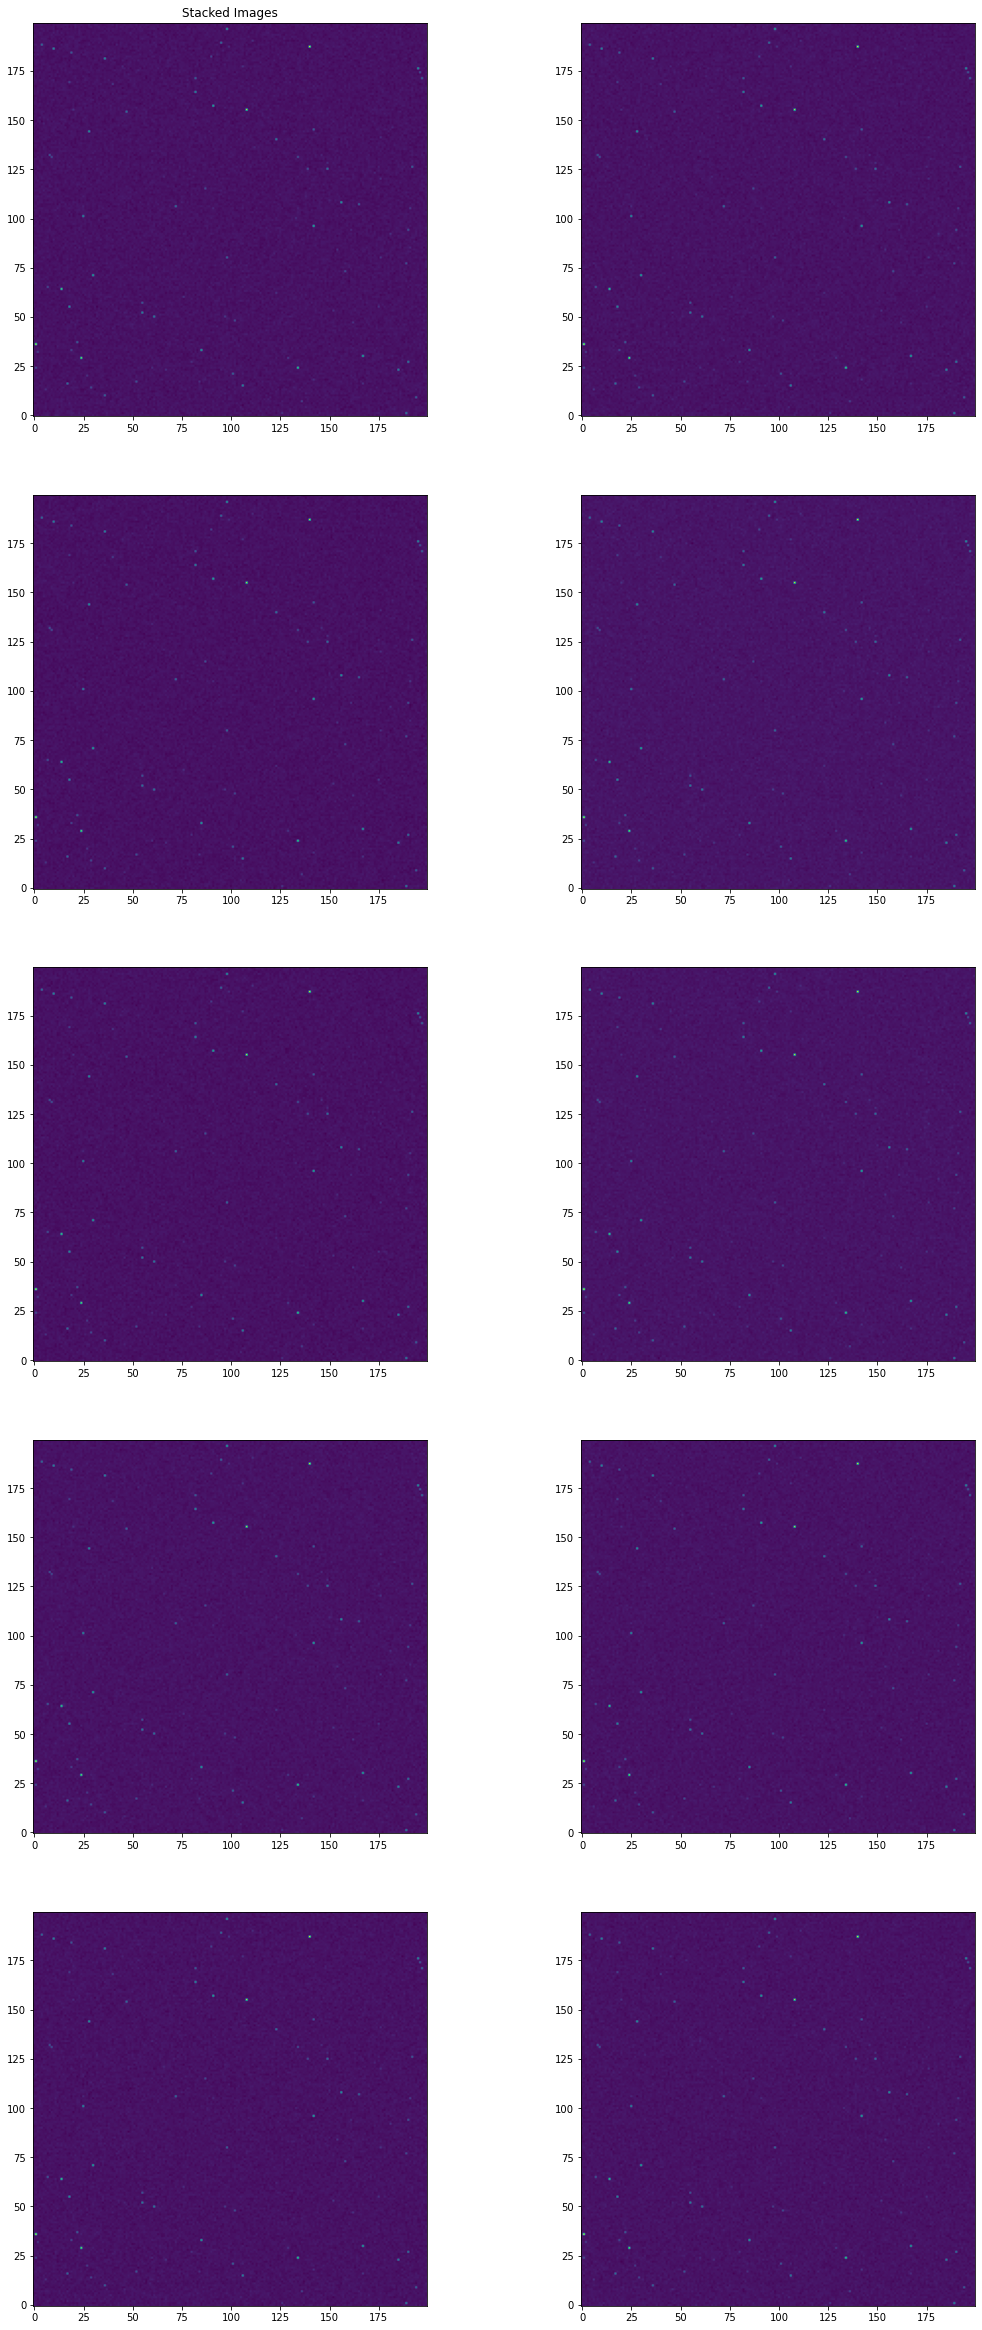

In [70]:
hf2 = h5py.File('images.h5', 'r')
hf2.keys()
data2 = np.array(hf2.get('image1'))
data3 = np.array(hf2.get('imagestack'))
im_stack_mid = np.swapaxes(data3, 0, 2)
image_stack = np.swapaxes(im_stack_mid, 1, 2)
fig, axes = plt.subplots(5, 2, figsize=(18, 42))
axes[0][0].set_title('Stacked Images')
for ax, image in zip(axes.flatten(), image_stack):
    ax.imshow(image, origin='lower')

2) Explore the data. Is there signal contamination? Is the background time dependent? Is it consistent spatially? Develop a plan to calculate your background pdf().

All 10 image looks the same, seem like there is no signal contamination. And also the brightness stay constant overtime so the background is not time dependent. To calculate the background pdf() to find the faintest star, we will sum the image and average it to decrease the background's spread so that it will be easier to find faint stars. After average the background, we can remove all outliers using 5 sigma threshold. Then when we have the background pdf(), we can use 5 sigma threhold to determine 

3) Using your background distribution, hunt for your signal (either faint stars, or a transient). Describe what you find.

-0.0001532093069965201
0.17777284206202734


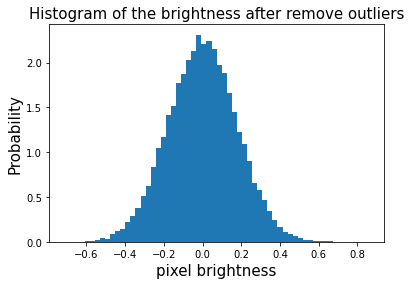

In [94]:
avg = np.sum(image_stack, axis=0)/10
mean = np.mean(avg_image)
std = np.std(avg_image)
for i in range(10):
    avg = avg[np.where((avg<=(mean+std*5))&(avg>=(mean-std*5)))]
    mean = np.mean(avg)
    std = np.std(avg)
fig, ax = plt.subplots(1)
ax.hist(avg, bins=60, density=True)
plt.title('Histogram of the brightness after remove outliers', size=15)
plt.xlabel('pixel brightness', size=15)
plt.ylabel('Probability',size=15)

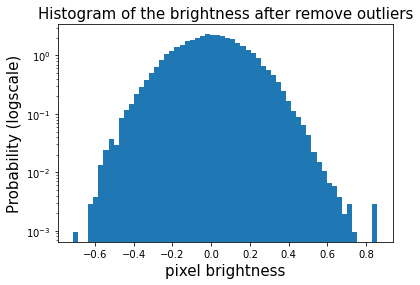

In [93]:
fig, ax = plt.subplots(1)
ax.hist(avg, bins=60, density=True)
plt.title('Histogram of the brightness after remove outliers', size=15)
plt.xlabel('pixel brightness', size=15)
plt.ylabel('Probability (logscale)',size=15)
plt.yscale('log')
plt.show()

this is the normalize background pdf() of the sum images after remove outliers. Then we can figure out what 5 sigma value is using the mean and standard deviation.

In [95]:
print("5 sigma value of the background pdf is", mean+std*5)

5 sigma value of the background pdf is 0.8887110010031403


So if the brightness is over 0.8887, then we can consider it a star.

In [98]:
faint_stars=avg_image[np.where(avg_image>=0.8887)]
print("with 5 sigma threhold, we found",len(faint_stars), "faint stars")

with 5 sigma threhold, we found  125 faint stars


4) You and your lab partner had different pdf(), but were using the same data. Explore why this is.

We are using the same data but had different pdf() because we are looking for different signals. For supernova, we need to compare and find the difference brightness of each image, not summing and average like faint star. 